In [ ]:
#the goal is to use gradient boosting to train a ML model to
#predict net present value (NPV) per well @ $3/MMBTU gas pricing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()

Saving Chapter5_NPV_DataSet.xlsx to Chapter5_NPV_DataSet.xlsx


{'Chapter5_NPV_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [4]:
df=pd.read_excel('Chapter5_NPV_DataSet.xlsx')
df.head()

,Lateral_length,Stage_length,Sand_to_water_ratio,Sand_per_ft,Water_per_ft,EUR_BCF,NPV_at_3.0_MMBTU_Gas Pricing
0,7796.2,294.814296,1.653957,1517.330240,21.296642,6.596621,-1.697469
1,3162.0,239.142870,1.346673,1239.217184,21.361937,8.690004,1.535818
2,7626.2,288.385704,1.465198,1587.723680,25.155551,8.479332,-0.488481
3,7372.9,300.253860,1.399383,1550.070512,25.714043,10.012118,-0.258850
4,5349.9,257.481810,1.108707,1912.739840,40.049252,5.942809,-2.552310


In [5]:
#for visualizing, use seaborn library to visualize the corelation between data and how they are distributed 

In [6]:
#no normalization needed since its a tree algorithm

In [7]:
x=df.drop(['NPV_at_3.0_MMBTU_Gas Pricing'], axis='columns')
y=df['NPV_at_3.0_MMBTU_Gas Pricing']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=1000)


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(loss='ls',min_samples_split=4, min_samples_leaf=2, max_depth=3, random_state=1000 )
gbr.fit(x_train, y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


In [28]:
from sklearn.metrics import r2_score
print(f' Training Score: {r2_score(y_train, y_pred_train)}, Testing Score: {r2_score(y_test, y_pred_test)}')

 Training Score: 0.9898598864277207, Testing Score: 0.9132412850946756


In [13]:
##############################################################################
#i will test some hyperparameters to be changed 
gbr=GradientBoostingRegressor(loss='lad',min_samples_split=4, min_samples_leaf=2, max_depth=3, random_state=1000 )
gbr.fit(x_train, y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)
print(f' Training Score: {r2_score(y_train, y_pred_train)}, Testing Score: {r2_score(y_test, y_pred_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


 Training Score: 0.920219788507788, Testing Score: 0.9185355761463371


In [14]:
gbr=GradientBoostingRegressor(loss='huber',min_samples_split=4, min_samples_leaf=2, max_depth=3, random_state=1000 )
gbr.fit(x_train, y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)
print(f' Training Score: {r2_score(y_train, y_pred_train)}, Testing Score: {r2_score(y_test, y_pred_test)}')

 Training Score: 0.9606404135321387, Testing Score: 0.9096388393227499


In [15]:
gbr=GradientBoostingRegressor(loss='quantile',min_samples_split=4, min_samples_leaf=2, max_depth=3, random_state=1000 )
gbr.fit(x_train, y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)
print(f' Training Score: {r2_score(y_train, y_pred_train)}, Testing Score: {r2_score(y_test, y_pred_test)}')

 Training Score: 0.7043905062435437, Testing Score: 0.6717793354906377


In [29]:
####################################################################

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


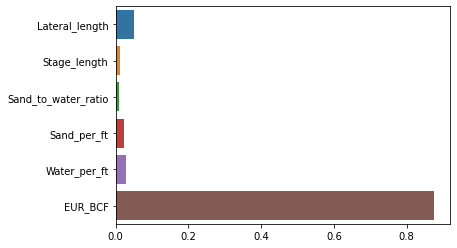

In [30]:
fi=gbr.feature_importances_
data=pd.Series(fi, df.columns[:-1])
sns.barplot(data, data.index)

In [32]:
from sklearn.model_selection import cross_val_score
(cross_val_score(gbr, x, y, cv=10, scoring='r2')).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

0.8542109379358468

In [33]:
(cross_val_score(gbr, x, y, cv=5, scoring='r2')).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

0.8566788383930714

In [34]:
(cross_val_score(gbr, x, y, cv=3, scoring='r2')).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


0.8733036236151485